In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../DATA/mouse_viral_study.csv')

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


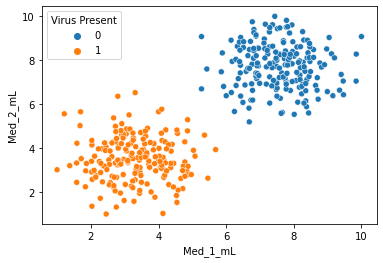

In [6]:
sns.scatterplot(data=df,x='Med_1_mL',y='Med_2_mL',hue='Virus Present');

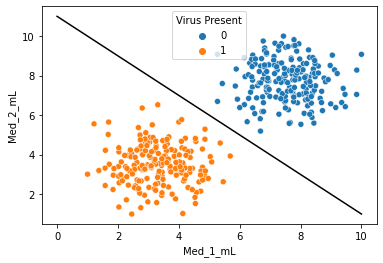

In [10]:
sns.scatterplot(data=df,x='Med_1_mL',y='Med_2_mL',hue='Virus Present')

x=np.linspace(0,10,100)
m=-1
b=11
y=m*x+b

plt.plot(x,y,'black')

In [11]:
from sklearn.svm import SVC

In [12]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [13]:
y=df['Virus Present']

In [14]:
X=df.drop('Virus Present',axis=1)

In [15]:
model=SVC(kernel='linear',C=1000)

In [17]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [18]:
from svm_margin_plot import plot_svm_boundary

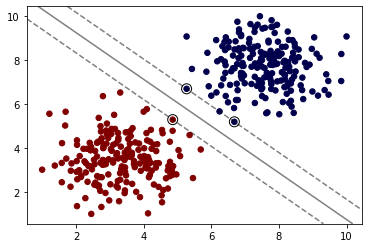

In [19]:
plot_svm_boundary(model,X,y)

In [20]:
model=SVC(kernel='linear',C=0.05)

In [21]:
model.fit(X,y)

SVC(C=0.05, kernel='linear')

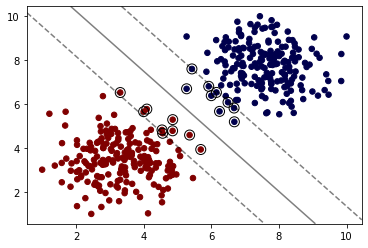

In [22]:
plot_svm_boundary(model,X,y)

In [25]:
model=SVC(kernel='linear',C=0.0005)

In [26]:
model.fit(X,y)

SVC(C=0.0005, kernel='linear')

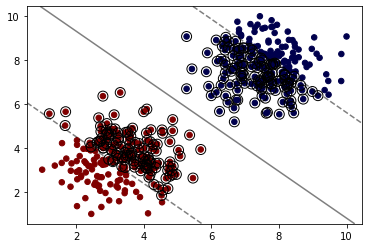

In [27]:
plot_svm_boundary(model,X,y)

In [28]:
model=SVC(kernel='rbf',C=1)

In [29]:
model.fit(X,y)

SVC(C=1)

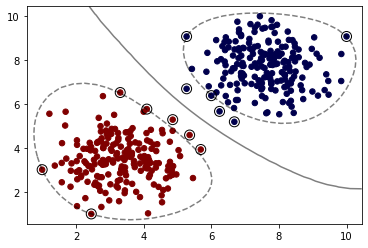

In [30]:
plot_svm_boundary(model,X,y)

In [36]:
model=SVC(kernel='rbf',C=0.05)

In [37]:
model.fit(X,y)

SVC(C=0.05)

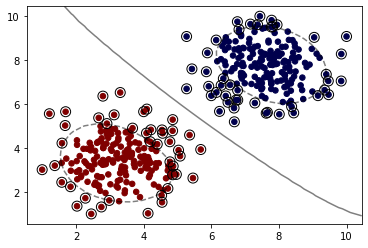

In [38]:
plot_svm_boundary(model,X,y)

In [44]:
model=SVC(kernel='rbf',C=1,gamma='scale')

In [45]:
model.fit(X,y)

SVC(C=1)

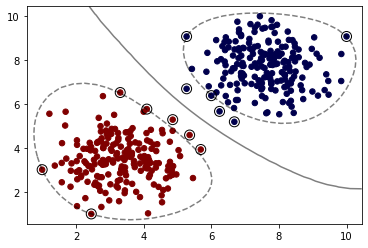

In [46]:
plot_svm_boundary(model,X,y)

In [49]:
model=SVC(kernel='rbf',C=1,gamma='auto')

In [50]:
model.fit(X,y)

SVC(C=1, gamma='auto')

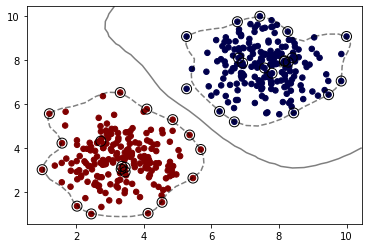

In [51]:
plot_svm_boundary(model,X,y)

In [52]:
model=SVC(kernel='sigmoid')

In [53]:
model.fit(X,y)

SVC(kernel='sigmoid')

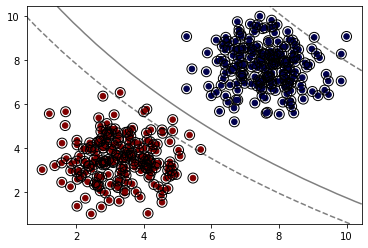

In [54]:
plot_svm_boundary(model,X,y)

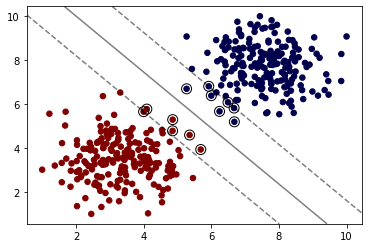

In [56]:
model=SVC(kernel='poly',degree=1)
model.fit(X,y)
plot_svm_boundary(model,X,y)

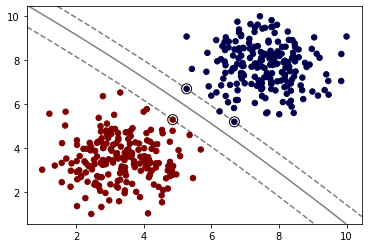

In [57]:
model=SVC(kernel='poly',degree=4)
model.fit(X,y)
plot_svm_boundary(model,X,y)

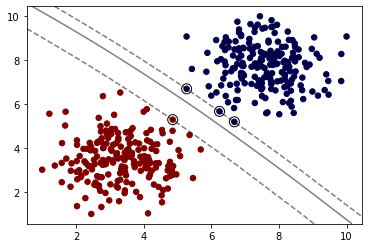

In [59]:
model=SVC(kernel='poly',degree=10,C=0.0005)
model.fit(X,y)
plot_svm_boundary(model,X,y)

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
svm=SVC()

In [62]:
param_grid={'C':[0.01,0.1,1],'kernel':['linear','rbf']}

In [65]:
grid=GridSearchCV(svm,param_grid=param_grid)

In [66]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [67]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [68]:
df=pd.read_csv('../DATA/cement_slump.csv')

In [69]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<AxesSubplot:>

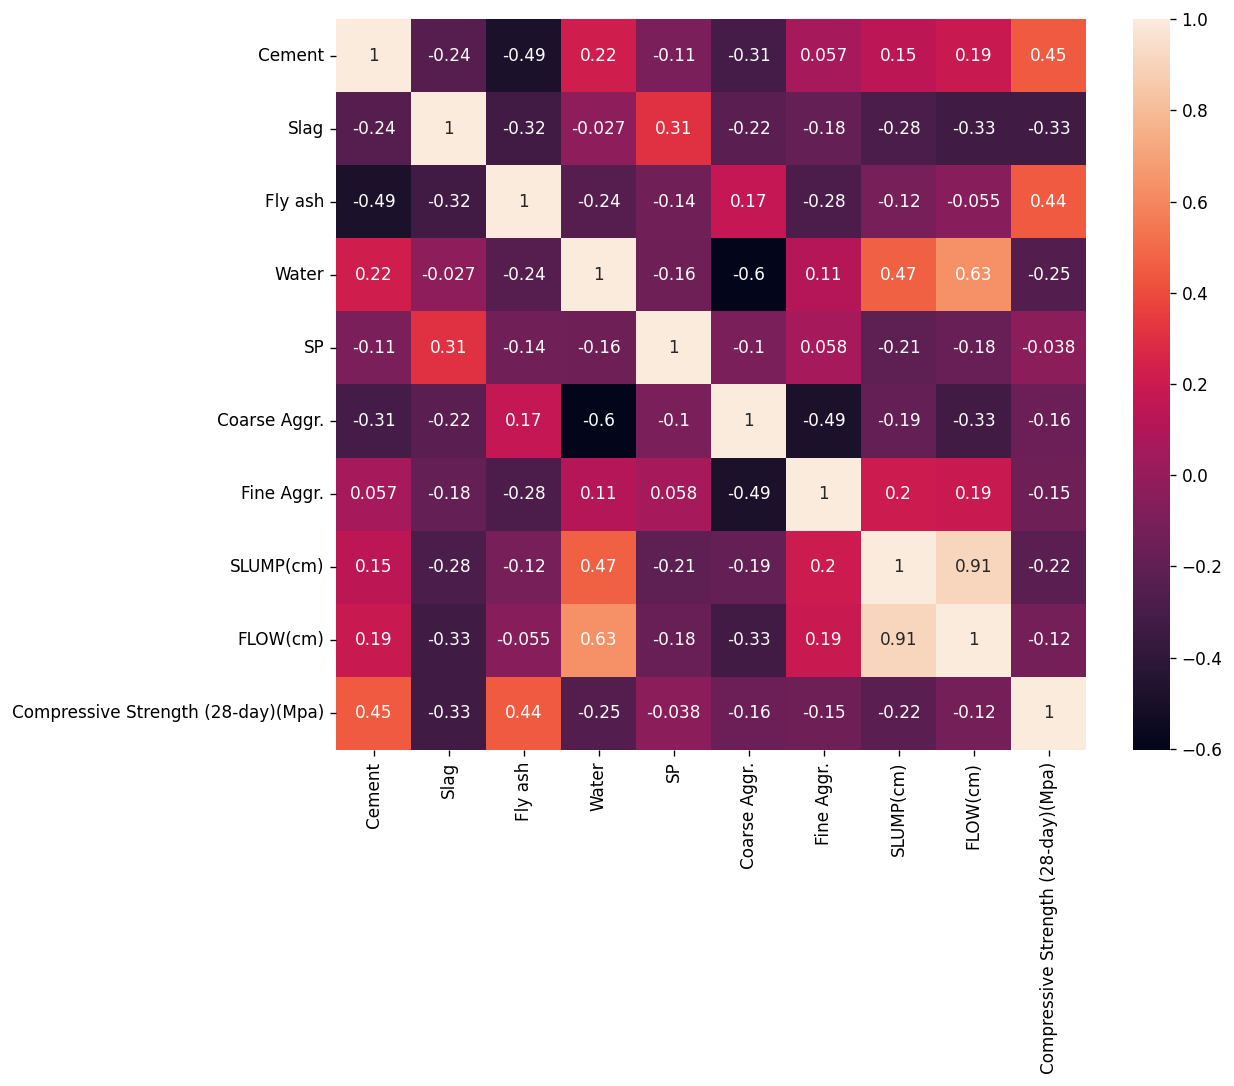

In [72]:
plt.figure(figsize=(10,8),dpi=121)
sns.heatmap(df.corr(),annot=True)

In [73]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [74]:
X=df.drop('Compressive Strength (28-day)(Mpa)',axis=1)

In [75]:
y=df['Compressive Strength (28-day)(Mpa)']

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler=StandardScaler()

In [80]:
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [81]:
from sklearn.svm import SVR,LinearSVR

In [82]:
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'
 |       Specifies th

In [83]:
base_model=SVR()

In [84]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [85]:
base_preds=base_model.predict(scaled_X_test)

In [86]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [87]:
mean_absolute_error(y_test,base_preds)

5.236902091259179

In [88]:
np.sqrt(mean_squared_error(y_test,base_preds))

6.695914838327133

In [89]:
param_grid={'C':[0.001,0.01,0.1,0.5,1],
           'kernel':['linear','rbf','poly'],
           'gamma':['scale','auto'],
           'degree':[2,3,4],'epsilon':[0,0.01,0.1,0.5,1,2]}

In [90]:
svr=SVR()

In [91]:
grid=GridSearchCV(svr,param_grid=param_grid)

In [92]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [93]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [94]:
grid_preds=grid.predict(scaled_X_test)

In [95]:
mean_absolute_error(y_test,grid_preds)

2.512801221076198

In [96]:
np.sqrt(mean_squared_error(y_test,grid_preds))

3.1782103051198347

In [97]:
### Practice ###

In [98]:
df=pd.read_csv('../DATA/cement_slump.csv')

In [99]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


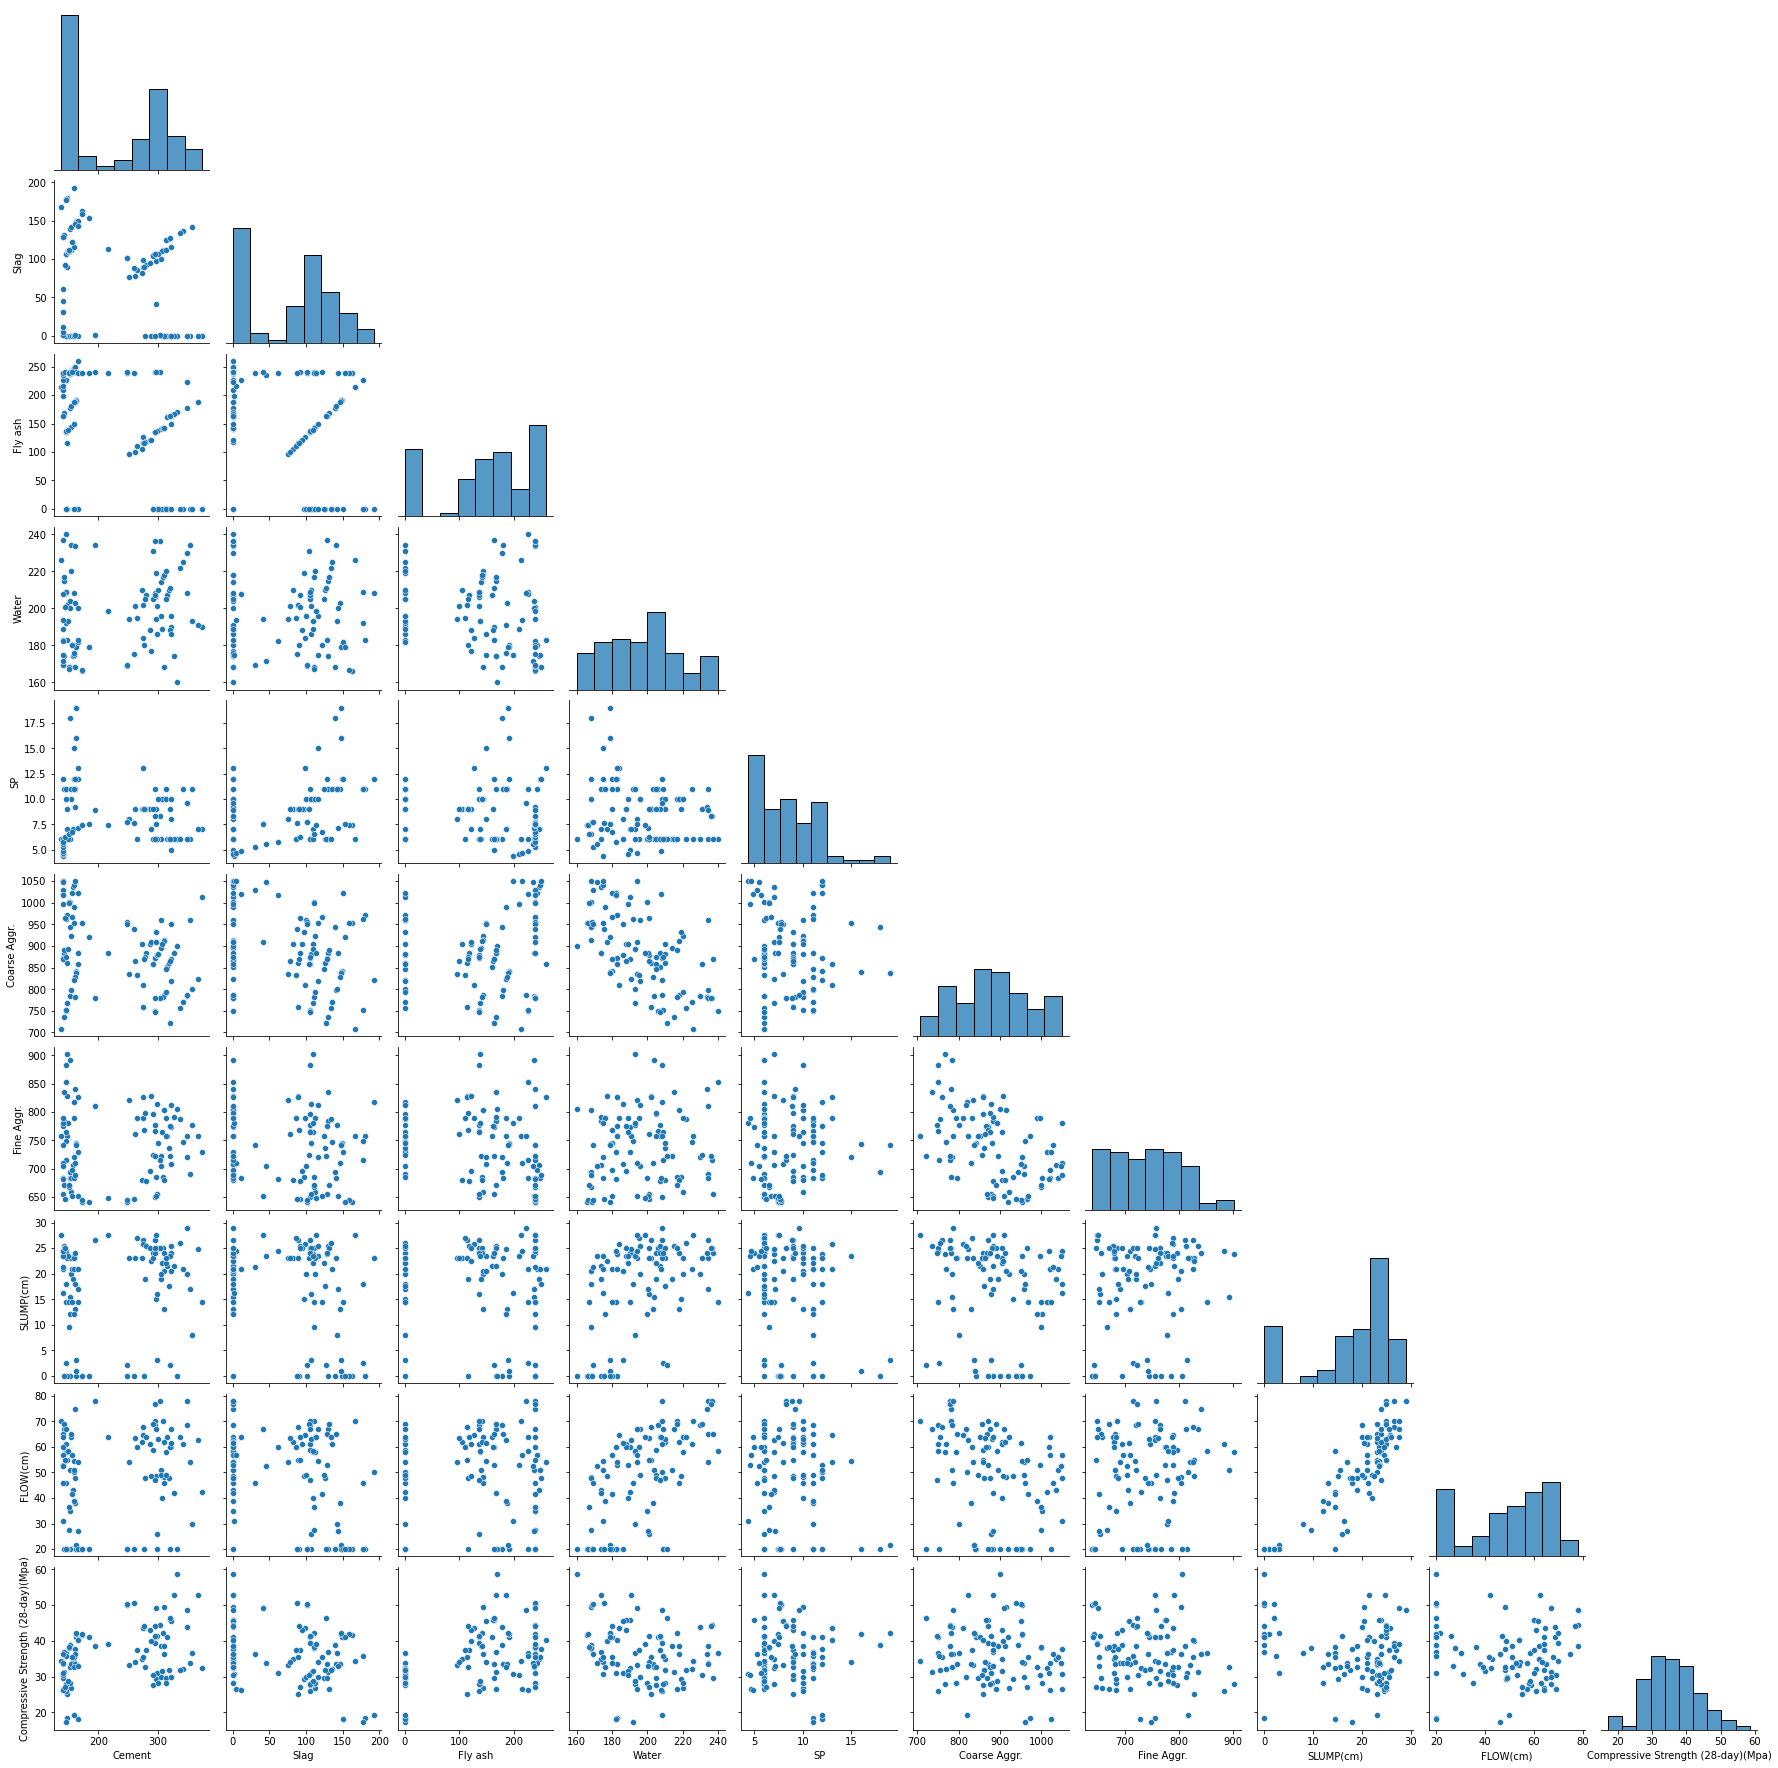

In [101]:
sns.pairplot(df,corner=True)

<AxesSubplot:>

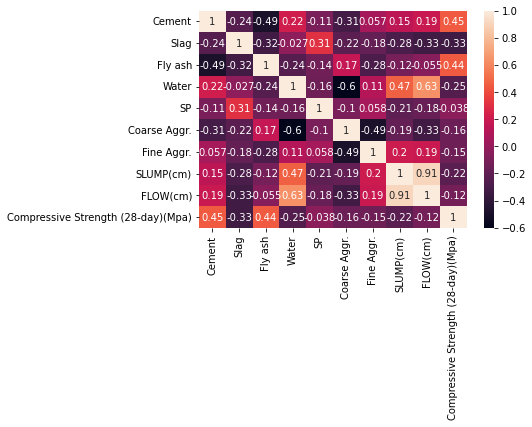

In [102]:
sns.heatmap(df.corr(),annot=True)

In [103]:
X=df.drop('Compressive Strength (28-day)(Mpa)',axis=1)
y=df['Compressive Strength (28-day)(Mpa)']

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
scaler=StandardScaler()

In [108]:
X_train=scaler.fit_transform(X_train)

In [109]:
X_test=scaler.transform(X_test)

In [110]:
from sklearn.svm import SVR

In [111]:
svr=SVR()

In [112]:
from sklearn.model_selection import GridSearchCV

In [119]:
param_grid={'kernel':['linear','sigmoid','poly','rbf'],
           'C':[0.0001,0.001,0.1,0.5,1,2,10,50,75,100,150],
           'epsilon':[0.001,0.01,0.1,0.5,0.8,1],
           'gamma':['scale','auto']}

In [120]:
grid=GridSearchCV(svr,param_grid=param_grid)

In [121]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.0001, 0.001, 0.1, 0.5, 1, 2, 10, 50, 75, 100,
                               150],
                         'epsilon': [0.001, 0.01, 0.1, 0.5, 0.8, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'sigmoid', 'poly', 'rbf']})

In [122]:
grid.best_estimator_.get_params()

{'C': 50,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.001,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [118]:
grid.best_params_

{'C': 50, 'epsilon': 0.001, 'gamma': 'auto', 'kernel': 'rbf'}

In [123]:
pred=grid.predict(X_test)

In [124]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [125]:
mean_absolute_error(y_test,pred)

1.948627598934678

In [126]:
np.sqrt(mean_squared_error(y_test,pred))

2.998479851901837

# Support Vector Machines 
## Exercise

## [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

<img src="wine.jpg">

## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**TASK: Your overall goal is to use the wine dataset shown below to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features. Complete the tasks below to follow along with the project.**

---
---

## Complete the Tasks in bold

**TASK: Run the cells below to import the libraries and load the dataset.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
df = pd.read_csv("../DATA/wine_fraud.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


**TASK: What are the unique variables in the target column we are trying to predict (quality)?**

In [4]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

In [99]:
#Expected Output

array(['Legit', 'Fraud'], dtype=object)

**TASK: Create a countplot that displays the count per category of Legit vs Fraud. Is the label/target balanced or unbalanced?**

<AxesSubplot:xlabel='quality', ylabel='count'>

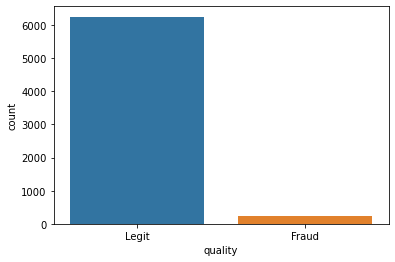

In [5]:
sns.countplot(data=df,x='quality')

<AxesSubplot:xlabel='quality', ylabel='count'>

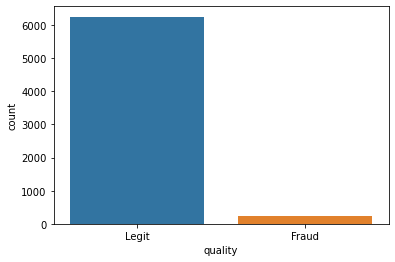

In [100]:
#Expected Output

**TASK: Let's find out if there is a difference between red and white wine when it comes to fraud. Create a countplot that has the wine *type* on the x axis with the hue separating columns by Fraud vs Legit.**

<AxesSubplot:xlabel='type', ylabel='count'>

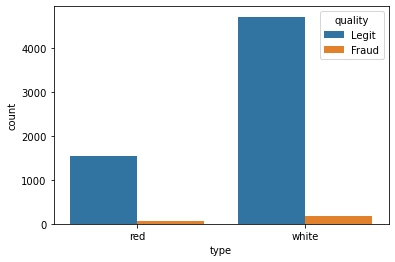

In [6]:
sns.countplot(data=df,x='type',hue='quality')

<AxesSubplot:xlabel='type', ylabel='count'>

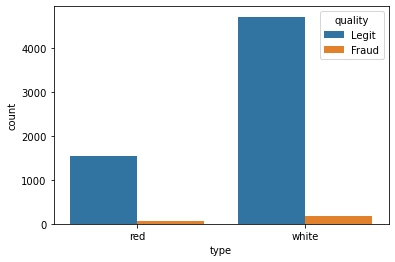

In [101]:
#Expected Output

**TASK: What percentage of red wines are Fraud? What percentage of white wines are fraud?**

In [33]:
print("Percentage of fraud in Red Wines: ",(len(df[(df['type']=='red')&(df['quality']=='Fraud')])/len(df[df['type']=='red']))*100)

Percentage of fraud in Red Wines:  3.9399624765478425


In [114]:
#Expected Output

Percentage of fraud in Red Wines:
3.9399624765478425


In [220]:
print("Percentage of fraud in White Wines: ",(len(df[(df['type']=='white')&(df['quality']=='Fraud')])/len(df[df['type']=='white']))*100)

Percentage of fraud in White Wines:  3.7362188648427925


In [115]:
#Expected Output

Percentage of fraud in White Wines:
3.7362188648427925


**TASK: Calculate the correlation between the various features and the "quality" column. To do this you may need to map the column to 0 and 1 instead of a string.**

In [61]:
df['quality']=df['quality'].map({'Legit':0,'Fraud':1})

In [62]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,red


In [63]:
df.corr()['quality']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
quality                 1.000000
Name: quality, dtype: float64

In [118]:
#Expected Output

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
Fraud                   1.000000
Name: Fraud, dtype: float64

**TASK: Create a bar plot of the correlation values to Fraudlent wine.**

<AxesSubplot:>

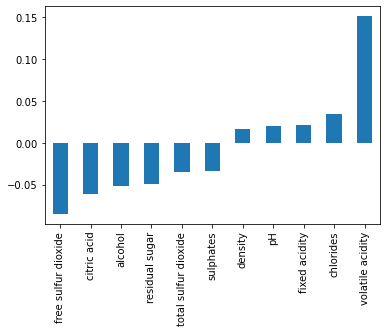

In [79]:
df.corr()['quality'].sort_values()[:-1].plot(kind='bar')

<AxesSubplot:>

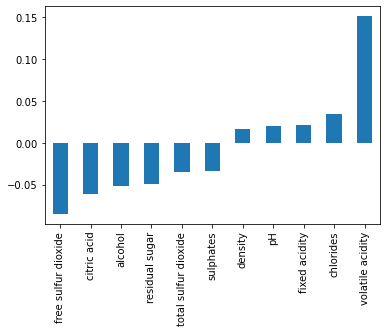

In [121]:
#Expected Output

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

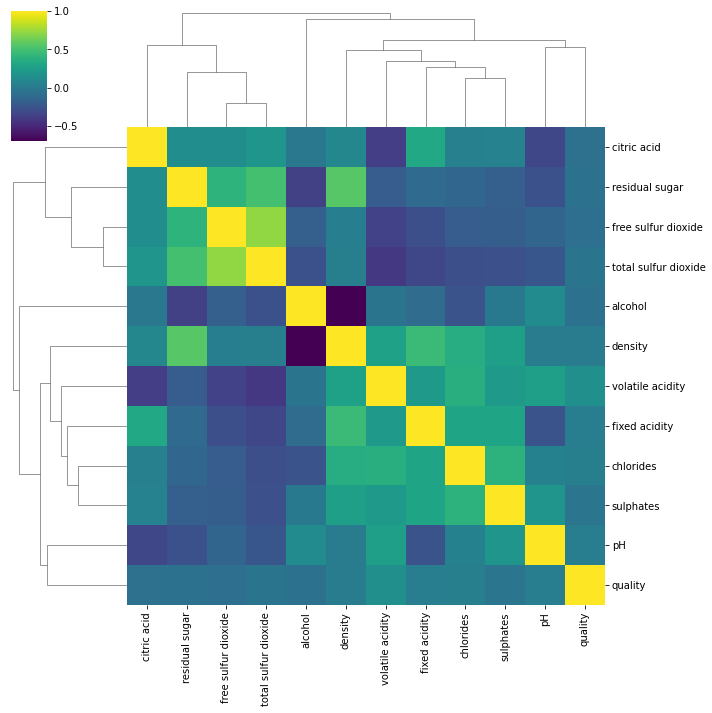

In [82]:
sns.clustermap(df.corr(),cmap='viridis')

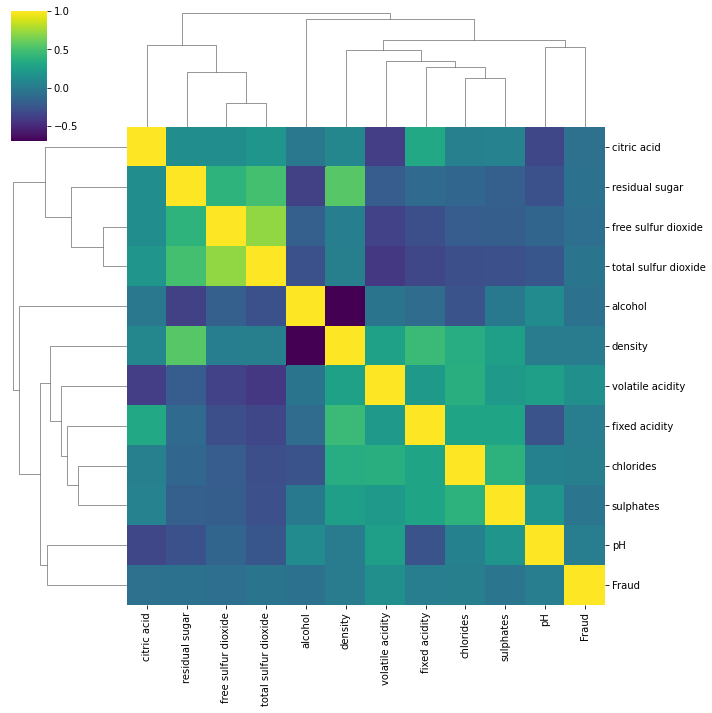

In [123]:
#Expected Output

----
## Machine Learning Model

**TASK: Convert the categorical column "type" from a string or "red" or "white" to dummy variables:**

In [169]:
df = pd.read_csv("../DATA/wine_fraud.csv")

In [170]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [171]:
df1=df.drop('quality',axis=1)

In [172]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red


In [173]:
df1=pd.get_dummies(df1,drop_first=True)

In [174]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


**TASK: Separate out the data into X features and y target label ("quality" column)**

In [175]:
X=df1

In [176]:
y=df['quality']

**TASK: Perform a Train|Test split on the data, with a 10% test size. Note: The solution uses a random state of 101**

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Scale the X train and X test data.**

In [179]:
from sklearn.preprocessing import StandardScaler

In [180]:
scaler=StandardScaler()

In [181]:
X_train=scaler.fit_transform(X_train)

In [182]:
X_test=scaler.transform(X_test)

**TASK: Create an instance of a Support Vector Machine classifier. Previously we have left this model "blank", (e.g. with no parameters). However, we already know that the classes are unbalanced, in an attempt to help alleviate this issue, we can automatically adjust weights inversely proportional to class frequencies in the input data with a argument call in the SVC() call. Check out the [documentation for SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) online and look up what the argument\parameter is.**

In [149]:
from sklearn.svm import SVC

In [183]:
svc=SVC(class_weight='balanced')

**TASK: Use a GridSearchCV to run a grid search for the best C and gamma parameters.**

In [201]:
from sklearn.model_selection import GridSearchCV

In [211]:
param_grid={'C':[0.001,0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}

In [212]:
grid=GridSearchCV(svc,param_grid=param_grid,cv=5)

In [213]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [214]:
grid.best_estimator_.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [215]:
grid.best_estimator_

SVC(C=1, class_weight='balanced', gamma='auto')

In [216]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}

In [217]:
y_pred=grid.predict(X_test)

In [142]:
#Expected Output

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [143]:
#Expected Output

{'C': 1, 'gamma': 'auto'}

**TASK: Display the confusion matrix and classification report for your model.**

In [166]:
from sklearn.metrics import confusion_matrix,classification_report

In [218]:
confusion_matrix(y_test,y_pred)

array([[ 17,  10],
       [ 92, 531]], dtype=int64)

In [219]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



In [146]:
#Expected Output

array([[ 17,  10],
       [ 92, 531]], dtype=int64)

In [147]:
#Expected Output

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650



**TASK: Finally, think about how well this model performed, would you suggest using it? Realistically will this work?**

**Ans:**
The precision score and f1-score for "Fraud" are quite low, indicating that the model was unable to accurately identify frauds. According to the above result, we can conclude that utilising this model will not be helpful in identifying frauds because merely chemical analysis would not be adequate to identify the "Frauds."